# Import and setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# laod data
df = pd.read_csv('../data/derived/combined_data_by_incident.csv', index_col=0)

In [3]:
# select columns for visualization
df = df[['year', 'country_id', 'country_txt_wb', 'country_txt_gtd', 'tourism_group', 'nvictim', 'nkill', 'nwound']]

In [4]:
# examine dataframe
df.head()

,year,country_id,country_txt_wb,country_txt_gtd,tourism_group,nvictim,nkill,nwound
0,2012,92,India,India,NaN,8.0,2.0,6.0
1,2012,123,Mali,Mali,low,36.0,36.0,0.0
2,2012,123,Mali,Mali,low,11.0,11.0,0.0
3,2012,603,United Kingdom,United Kingdom,high,0.0,0.0,0.0
4,2012,92,India,India,NaN,13.0,13.0,0.0


# Data exploration

In [5]:
# define columns of interest
columns_of_interest = ['nvictim', 'nkill', 'nwound']

What is the distribution of number of victims, killed and wounded across incidents?

In [6]:
# describe columns of interest
df[columns_of_interest].describe()

,nvictim,nkill,nwound
count,16995.000000,16995.000000,16995.000000
mean,2.916093,1.018594,1.897499
std,13.804926,5.757231,10.643692
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000
max,520.000000,311.000000,433.000000


All variables have 16995 values, representing 16995 incidents.

All variables follow a similar right-skewed distribution pattern of having mostly 0's with some high outliers.

The number of victims ranges from 0 to 520. Most values are 0. The median is 1, the mean is 2.916, and the standard deviation is 13.804. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

The number of victims ranges from 0 to 311. Most values are 0. The median is 0, the mean is 1.018, and the standard deviation is 5.757. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

The number of wounded ranges from 0 to 433. Most values are 0. The median is 0, the mean is 1.897, and the standard deviation is 10.643. The distribution has many low numbers (thankfully) with a few high numbers - it is right skewed.

# Strip plot by tourism group

In [7]:
def plot_strip_plot(column_of_interest, add_box_plot=False, show_all_countries=True):
    
    # find slices for all countries, and countries with high and low tourism
    all_df  = df
    high_df = df[df['tourism_group']=='high']
    low_df  = df[df['tourism_group']=='low']
    
    # find sample sizes
    all_df_n, high_df_n, low_df_n = ['n = ' + str(len(i)) for i in [all_df, high_df, low_df]]    
    
    # set style
    sns.set_style('whitegrid')
    
    # set number of subplots accordingly
    subplot_n = 3 if show_all_countries else 2
    
    # create figure
    fig, axs = plt.subplots(1, subplot_n, sharex=True, sharey=True, figsize=(15,5))
    fig.subplots_adjust(wspace=.05, hspace=0)

    # create strip plots
    if show_all_countries: sns.stripplot(y=column_of_interest, data=all_df,  ax=axs[0])
    sns.stripplot(y=column_of_interest, data=high_df, ax=axs[subplot_n-2])
    sns.stripplot(y=column_of_interest, data=low_df,  ax=axs[subplot_n-1])
    
    # optionally add box plots
    if add_box_plot:
        if show_all_countries: sns.boxplot(y=column_of_interest, data=all_df,  ax=axs[0], zorder=10, whis=1, color='white', showfliers=False)
        sns.boxplot(y=column_of_interest, data=high_df, ax=axs[subplot_n-2], zorder=10, whis=1, color='white', showfliers=False)
        sns.boxplot(y=column_of_interest, data=low_df,  ax=axs[subplot_n-1], zorder=10, whis=1, color='white', showfliers=False)

    # add title
    if column_of_interest == 'nvictim':
        plot_title = 'Number of Victims per Incident'
    elif column_of_interest == 'nkill':
        plot_title = 'Number of Fatalities per Incident'
    elif column_of_interest == 'nwound':
        plot_title = 'Number of Non-Fatal Wounded per Incident'
    else:
        plot_title = column_of_interest
    fig.suptitle(plot_title, fontsize=12, fontweight ="bold")
    
    # add subplot titles
    if show_all_countries: axs[0].set(ylabel='Count', xlabel = all_df_n,  title='All')
    axs[subplot_n-2].set(ylabel=None,    xlabel = high_df_n, title='High Tourism')
    axs[subplot_n-1].set(ylabel=None,    xlabel = low_df_n,  title='Low Tourism')

    # show plot
    plt.show()

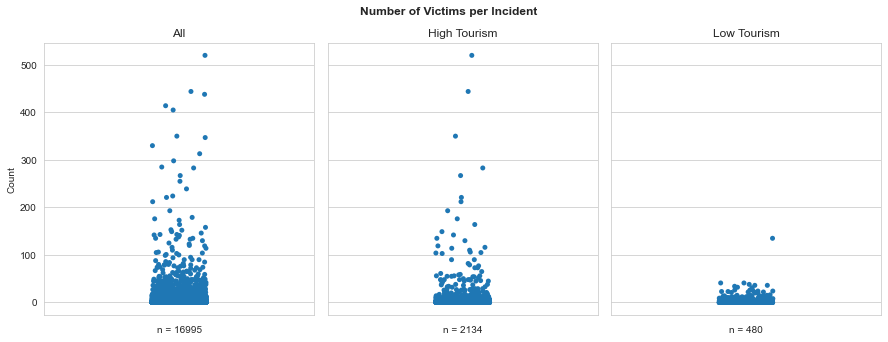

In [8]:
plot_strip_plot('nvictim', add_box_plot=False, show_all_countries=True)

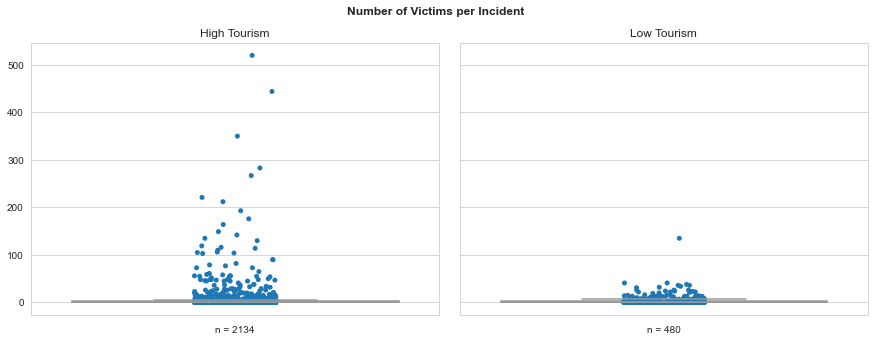

In [9]:
plot_strip_plot('nvictim', add_box_plot=True, show_all_countries=False)

# Interpretation

In [10]:
# find slices for all countries, and countries with high and low tourism
all_df  = df
high_df = df[df['tourism_group']=='high']
low_df  = df[df['tourism_group']=='low']

In [11]:
# describe number of victims for all countries
all_df['nvictim'].describe()

count    16995.000000
mean         2.916093
std         13.804926
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max        520.000000
Name: nvictim, dtype: float64

In [12]:
# describe number of victims for all countries
high_df['nvictim'].describe()

count    2134.000000
mean        4.972821
std        23.889165
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       520.000000
Name: nvictim, dtype: float64

In [13]:
# describe number of victims for all countries
low_df['nvictim'].describe()

count    480.000000
mean       3.895833
std        8.794190
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      135.000000
Name: nvictim, dtype: float64

In [14]:
# find number of incidents with >100 victims
print(f'In all countries, there are {sum(all_df.nvictim>100)} incidents with over 100 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>100)} incidents with over 100 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>100)} incidents with over 100 victims.')

In all countries, there are 50 incidents with over 100 victims.
In high tourism countries, there are 22 incidents with over 100 victims.
In low tourism countries, there are 1 incidents with over 100 victims.


In [15]:
# find number of incidents with >50 victims
print(f'In all countries, there are {sum(all_df.nvictim>50)} incidents with over 50 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>50)} incidents with over 50 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>50)} incidents with over 50 victims.')

In all countries, there are 110 incidents with over 50 victims.
In high tourism countries, there are 41 incidents with over 50 victims.
In low tourism countries, there are 1 incidents with over 50 victims.


In [16]:
# find number of incidents with >10 victims
print(f'In all countries, there are {sum(all_df.nvictim>10)} incidents with over 10 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>10)} incidents with over 10 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>10)} incidents with over 10 victims.')

In all countries, there are 760 incidents with over 10 victims.
In high tourism countries, there are 148 incidents with over 10 victims.
In low tourism countries, there are 46 incidents with over 10 victims.


In [17]:
# find number of incidents with >1 victims
print(f'In all countries, there are {sum(all_df.nvictim>1)} incidents with over 1 victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim>1)} incidents with over 1 victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim>1)} incidents with over 1 victims.')

In all countries, there are 5497 incidents with over 1 victims.
In high tourism countries, there are 740 incidents with over 1 victims.
In low tourism countries, there are 215 incidents with over 1 victims.


In [18]:
# find number of incidents with 0 victims
print(f'In all countries, there are {sum(all_df.nvictim==0)} incidents with no victims.')
print(f'In high tourism countries, there are {sum(high_df.nvictim==0)} incidents with no victims.')
print(f'In low tourism countries, there are {sum(low_df.nvictim==0)} incidents with no victims.')

In all countries, there are 7593 incidents with no victims.
In high tourism countries, there are 1016 incidents with no victims.
In low tourism countries, there are 199 incidents with no victims.


**Key takeaway:** Countries with high tourism have more incidents and more victims per incident than countries with low tourism.